# Final Project Story 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from sklearn import linear_model

### Loading and Inspecting the data.

In [2]:
# Loading and displaying the subsetted data.
df = pd.read_csv('/dsa/data/DSA-7010/MO_County_Data_CSV_DSA7010F23_Project_Data.csv')
cols = ['cnty_name','usac_rural','pop_2014','pctpopwbba','pctpopwobb','E_EDUC_HS','E_EDUC_Col','E_EDUC_Bac','HEdTotEnroll','HEdTotEmp','E_Emp_64','pct_unempl']

df = df[cols]
df.head()

,cnty_name,usac_rural,pop_2014,pctpopwbba,pctpopwobb,E_EDUC_HS,E_EDUC_Col,E_EDUC_Bac,HEdTotEnroll,HEdTotEmp,E_Emp_64,pct_unempl
0,Adair,Rural,25602,74.5,25.5,4831,3354,4058,9602,2207,17165,5.4
1,Andrew,Partially Rural,17379,83.5,16.5,4609,3620,2869,0,0,10214,4.8
2,Atchison,Rural,5382,0.0,100.0,1553,1119,885,0,0,2938,5.2
3,Audrain,Rural,25887,69.4,30.6,8177,4340,2557,0,0,15352,5.8
4,Barry,Rural,35662,48.3,51.7,10064,6632,3562,0,0,20381,5.8


In [3]:
# Understanding the datatypes and no of rows I will be working with.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 12 columns):
cnty_name       115 non-null object
usac_rural      115 non-null object
pop_2014        115 non-null int64
pctpopwbba      115 non-null float64
pctpopwobb      115 non-null float64
E_EDUC_HS       115 non-null int64
E_EDUC_Col      115 non-null int64
E_EDUC_Bac      115 non-null int64
HEdTotEnroll    115 non-null int64
HEdTotEmp       115 non-null int64
E_Emp_64        115 non-null int64
pct_unempl      115 non-null float64
dtypes: float64(3), int64(7), object(2)
memory usage: 10.9+ KB


In [4]:
# Checks and returns number of missing values if any.
df.isnull().sum().sum()

0

In [5]:
# Shows the no.of counties per group.
df.usac_rural.value_counts()

Rural              91
Partially Rural    21
Urban               3
Name: usac_rural, dtype: int64

In [6]:
# Useful as a reference for me while doing analysis.
df.describe()

,pop_2014,pctpopwbba,pctpopwobb,E_EDUC_HS,E_EDUC_Col,E_EDUC_Bac,HEdTotEnroll,HEdTotEmp,E_Emp_64,pct_unempl
count,1.150000e+02,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,5.272686e+04,47.756522,52.243478,11004.773913,10799.556522,10239.304348,3293.043478,711.260870,32217.513043,6.493043
std,1.236445e+05,30.623598,30.623598,20391.743854,25569.090145,33237.987728,10581.450243,2891.683793,76557.806984,1.159909
min,2.073000e+03,0.000000,0.000000,622.000000,404.000000,259.000000,0.000000,0.000000,1118.000000,4.100000
25%,1.022600e+04,19.700000,28.300000,3065.000000,2000.500000,994.500000,0.000000,0.000000,5902.500000,5.700000
50%,1.854100e+04,52.800000,47.200000,5435.000000,3488.000000,2015.000000,0.000000,0.000000,10746.000000,6.400000
75%,3.846300e+04,71.700000,80.300000,9476.500000,7874.000000,4389.500000,1709.500000,262.500000,22306.500000,7.300000
max,1.001876e+06,100.000000,100.000000,146164.000000,199326.000000,297525.000000,83116.000000,25774.000000,604431.000000,10.000000


### Data Carpentry

In [7]:
# Adding three new columns to convert Percentage columns to integer columns.
df['popwbba'] = (df.pop_2014*df.pctpopwbba)/100
df['popwobb'] = (df.pop_2014*df.pctpopwobb)/100
df['unempl'] = (df.pop_2014*df.pct_unempl)/100

In [8]:
# Converting float columns to integer
df['popwbba'] = df['popwbba'].astype('int')
df['popwobb'] = df['popwobb'].astype('int')
df['unempl'] = df['unempl'].astype('int') 

In [9]:
# Rearranging the dataframe and removing the initial percentage columns.
df = df[['cnty_name','usac_rural','pop_2014','popwbba','popwobb','E_EDUC_HS','E_EDUC_Col','E_EDUC_Bac','HEdTotEnroll','HEdTotEmp','E_Emp_64','unempl']]
df.head()

,cnty_name,usac_rural,pop_2014,popwbba,popwobb,E_EDUC_HS,E_EDUC_Col,E_EDUC_Bac,HEdTotEnroll,HEdTotEmp,E_Emp_64,unempl
0,Adair,Rural,25602,19073,6528,4831,3354,4058,9602,2207,17165,1382
1,Andrew,Partially Rural,17379,14511,2867,4609,3620,2869,0,0,10214,834
2,Atchison,Rural,5382,0,5382,1553,1119,885,0,0,2938,279
3,Audrain,Rural,25887,17965,7921,8177,4340,2557,0,0,15352,1501
4,Barry,Rural,35662,17224,18437,10064,6632,3562,0,0,20381,2068


### EDA

In [10]:
# I am planning to use only rural and partially rural counties for my analysis. 
# Since very few urban cities are present, I am excluding them from this specific analysis.

prural_data = df[(df.usac_rural == 'Rural') | (df.usac_rural == 'Partially Rural')]
rural_data = df[df.usac_rural == 'Rural']
prural_data.head()

,cnty_name,usac_rural,pop_2014,popwbba,popwobb,E_EDUC_HS,E_EDUC_Col,E_EDUC_Bac,HEdTotEnroll,HEdTotEmp,E_Emp_64,unempl
0,Adair,Rural,25602,19073,6528,4831,3354,4058,9602,2207,17165,1382
1,Andrew,Partially Rural,17379,14511,2867,4609,3620,2869,0,0,10214,834
2,Atchison,Rural,5382,0,5382,1553,1119,885,0,0,2938,279
3,Audrain,Rural,25887,17965,7921,8177,4340,2557,0,0,15352,1501
4,Barry,Rural,35662,17224,18437,10064,6632,3562,0,0,20381,2068


In [12]:
# Displaying the correlation matrix and pairplot to look for any linear relationships among the attributes.
prural_data.corr()

,pop_2014,popwbba,popwobb,E_EDUC_HS,E_EDUC_Col,E_EDUC_Bac,HEdTotEnroll,HEdTotEmp,E_Emp_64,unempl
pop_2014,1.000000,0.998152,0.157675,0.986369,0.997427,0.983553,0.891580,0.870024,0.999479,0.993912
popwbba,0.998152,1.000000,0.097377,0.981682,0.995173,0.986301,0.888926,0.871505,0.997536,0.992534
popwobb,0.157675,0.097377,1.000000,0.202062,0.163953,0.080885,0.156936,0.086985,0.159152,0.149247
E_EDUC_HS,0.986369,0.981682,0.202062,1.000000,0.992311,0.942463,0.842245,0.795534,0.987926,0.988610
E_EDUC_Col,0.997427,0.995173,0.163953,0.992311,1.000000,0.972277,0.871189,0.840260,0.997517,0.993135
E_EDUC_Bac,0.983553,0.986301,0.080885,0.942463,0.972277,1.000000,0.901281,0.911822,0.980637,0.969576
HEdTotEnroll,0.891580,0.888926,0.156936,0.842245,0.871189,0.901281,1.000000,0.965344,0.895032,0.863230
HEdTotEmp,0.870024,0.871505,0.086985,0.795534,0.840260,0.911822,0.965344,1.000000,0.869170,0.842099
E_Emp_64,0.999479,0.997536,0.159152,0.987926,0.997517,0.980637,0.895032,0.869170,1.000000,0.992536
unempl,0.993912,0.992534,0.149247,0.988610,0.993135,0.969576,0.863230,0.842099,0.992536,1.000000


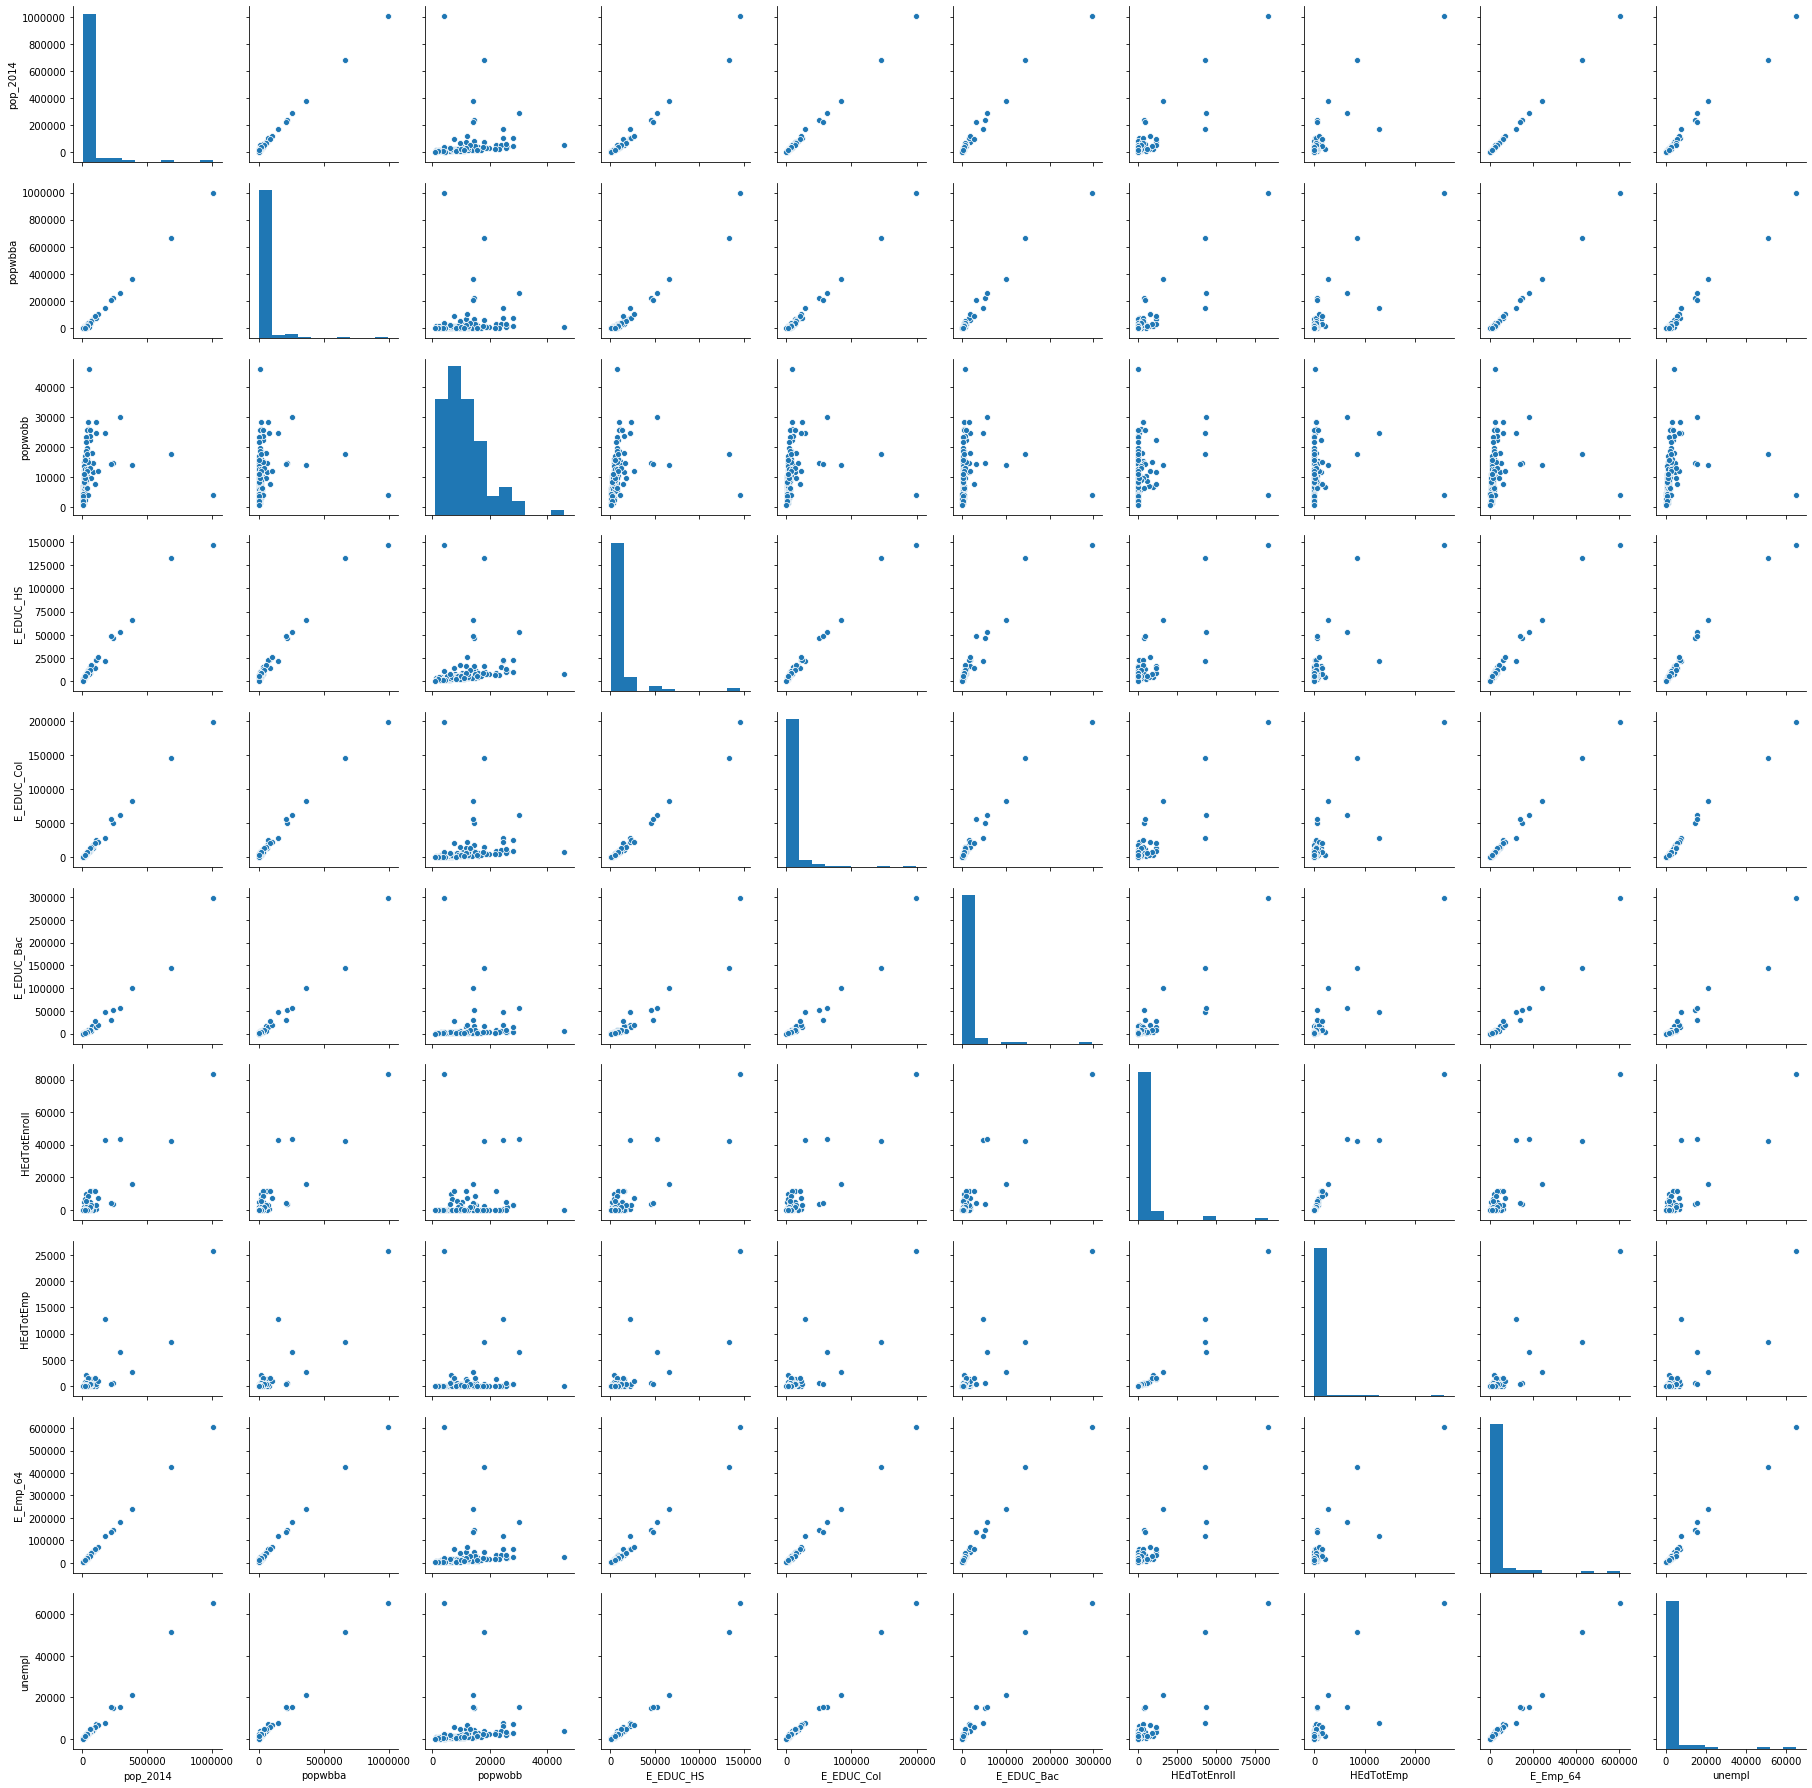

In [13]:
sns.pairplot(prural_data)

In [14]:
# Rural county's with most employment
rural_data.sort_values(by=['E_Emp_64'],ascending=False).head()

,cnty_name,usac_rural,pop_2014,popwbba,popwobb,E_EDUC_HS,E_EDUC_Col,E_EDUC_Bac,HEdTotEnroll,HEdTotEmp,E_Emp_64,unempl
35,Franklin,Rural,102084,73908,28175,23225,24918,14241,2680,387,61877,7145
56,Lincoln,Rural,54249,30542,23706,15381,11022,5802,0,0,34182,4014
50,Johnson,Rural,54362,32127,22234,9257,9527,8249,11516,1386,32607,3316
105,Taney,Rural,54230,41214,13015,12801,13629,6940,1565,399,31713,4826
80,Phelps,Rural,44847,29912,14934,8361,7869,8214,8774,1540,28389,2645


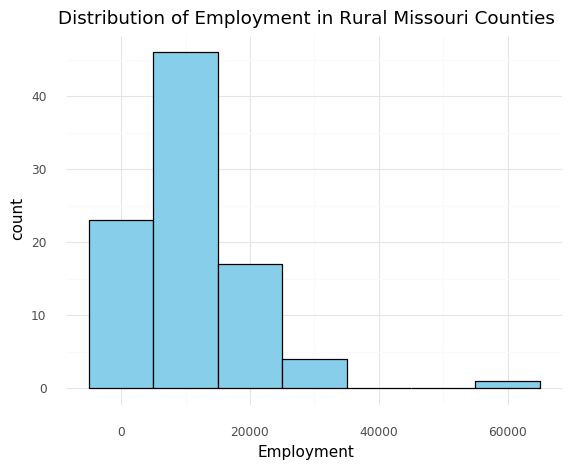

<ggplot: (-9223363250097321584)>

In [15]:
# Plot that shows the distribution of Employment in rural counties
plot1 = ggplot(rural_data,aes(x = 'E_Emp_64')) + geom_histogram(binwidth = 10000, fill = "skyblue", color = "black") +\
        labs(title = "Distribution of Employment in Rural Missouri Counties",x = "Employment") + theme_minimal()
plot1

-------------------------------------------------------------------

### Building a model to predict estimated count of employed people.

Here I picked up attributes related to broadband accessibility, education rates, total enrollment, unemployment
numbers and tried to predict the employment rate.

In [16]:

train = df.sample(frac=7/10, random_state = 1)
test = df.drop(train.index)

In [17]:
train_X = np.asarray(train[['popwbba','popwobb','E_EDUC_HS','E_EDUC_Col','E_EDUC_Bac','HEdTotEnroll','HEdTotEmp','unempl']])
train_y = np.asarray(train.E_Emp_64)

test_X = np.asarray(test[['popwbba','popwobb','E_EDUC_HS','E_EDUC_Col','E_EDUC_Bac','HEdTotEnroll','HEdTotEmp','unempl']])
test_y = np.asarray(test.E_Emp_64)

In [18]:
regr = linear_model.LinearRegression()

In [19]:
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print('R-Squared: {}'.format(regr.score(train_X, train_y)))
print('R-Squared: {}'.format(regr.score(test_X, test_y)))

R-Squared: 0.9997629375208924
R-Squared: 0.9045847630942091


From the R-squared results, we can see that these variables are highly correlated with employment rates and the data fit the model very well.

### Another model. (with different attributes)

Here I picked some other factors from the aspects of income, poverty, disability, etc to try and see if they have any correlation with employment rates.

In [21]:

newdf = pd.read_csv('/dsa/data/DSA-7010/MO_County_Data_CSV_DSA7010F23_Project_Data.csv')
newdf = newdf[['cnty_name','GiniIndex','Disability','EVet_A65_7','E_MEDINC','EVetMEDINC','ENovetMEDI','E_BPovLev','E_Emp_64']]
newdf.head()

,cnty_name,GiniIndex,Disability,EVet_A65_7,E_MEDINC,EVetMEDINC,ENovetMEDI,E_BPovLev,E_Emp_64
0,Adair,0.513,3083,430,19948,40769,18324,5087,17165
1,Andrew,0.415,2434,246,30332,42925,29279,1138,10214
2,Atchison,0.417,961,153,27793,35288,26858,401,2938
3,Audrain,0.439,3769,606,23528,33208,22235,2416,15352
4,Barry,0.451,6357,970,22485,31708,21695,4799,20381


In [22]:
newdf.corr()

,GiniIndex,Disability,EVet_A65_7,E_MEDINC,EVetMEDINC,ENovetMEDI,E_BPovLev,E_Emp_64
GiniIndex,1.000000,0.220699,0.158177,-0.429838,-0.218280,-0.404317,0.303417,0.186864
Disability,0.220699,1.000000,0.985811,0.416530,0.360622,0.411225,0.956498,0.993147
EVet_A65_7,0.158177,0.985811,1.000000,0.471859,0.404536,0.462671,0.905722,0.991507
E_MEDINC,-0.429838,0.416530,0.471859,1.000000,0.700376,0.989631,0.326574,0.464762
EVetMEDINC,-0.218280,0.360622,0.404536,0.700376,1.000000,0.616120,0.305709,0.393646
ENovetMEDI,-0.404317,0.411225,0.462671,0.989631,0.616120,1.000000,0.326451,0.459433
E_BPovLev,0.303417,0.956498,0.905722,0.326574,0.305709,0.326451,1.000000,0.936492
E_Emp_64,0.186864,0.993147,0.991507,0.464762,0.393646,0.459433,0.936492,1.000000


In [23]:
newtrain = newdf.sample(frac=7/10, random_state = 1)
newtest = newdf.drop(newtrain.index)

In [24]:
newtrain_X = np.asarray(newtrain[['GiniIndex','Disability','EVet_A65_7','E_MEDINC','EVetMEDINC','ENovetMEDI','E_BPovLev']])
newtrain_y = np.asarray(newtrain.E_Emp_64)

newtest_X = np.asarray(newtest[['GiniIndex','Disability','EVet_A65_7','E_MEDINC','EVetMEDINC','ENovetMEDI','E_BPovLev']])
newtest_y = np.asarray(newtest.E_Emp_64)

In [25]:
newregr = linear_model.LinearRegression()

In [26]:
newregr.fit(newtrain_X, newtrain_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
print('R-Squared: {}'.format(newregr.score(newtrain_X, newtrain_y)))
print('R-Squared: {}'.format(newregr.score(newtest_X, newtest_y)))

R-Squared: 0.9954810717971505
R-Squared: 0.8614437386602591


Similarily, here we can see that R squared results are promising. Even these factors can somewhat play a role towards employment.

### Final Model

Finally, I chose relevant attributes from the models above to make a final model and conclude my findings.

In [28]:
finaldf = pd.read_csv('/dsa/data/DSA-7010/MO_County_Data_CSV_DSA7010F23_Project_Data.csv')
finaldf = finaldf[['E_EDUC_HS','E_EDUC_Col','GiniIndex','E_MEDINC','EVetMEDINC','ENovetMEDI','E_BPovLev']]
extracted = df[['popwbba','popwobb','unempl','E_Emp_64']]
finaldf = finaldf.join(extracted)
finaldf.head()

,E_EDUC_HS,E_EDUC_Col,GiniIndex,E_MEDINC,EVetMEDINC,ENovetMEDI,E_BPovLev,popwbba,popwobb,unempl,E_Emp_64
0,4831,3354,0.513,19948,40769,18324,5087,19073,6528,1382,17165
1,4609,3620,0.415,30332,42925,29279,1138,14511,2867,834,10214
2,1553,1119,0.417,27793,35288,26858,401,0,5382,279,2938
3,8177,4340,0.439,23528,33208,22235,2416,17965,7921,1501,15352
4,10064,6632,0.451,22485,31708,21695,4799,17224,18437,2068,20381


In [29]:
finaltrain = finaldf.sample(frac=7/10, random_state = 1)
finaltest = finaldf.drop(finaltrain.index)
finaltrain_X = np.asarray(finaltrain[['E_EDUC_HS','E_EDUC_Col','GiniIndex','E_MEDINC','EVetMEDINC','ENovetMEDI','E_BPovLev','popwbba','popwobb','unempl']])
finaltrain_y = np.asarray(finaltrain.E_Emp_64)

finaltest_X = np.asarray(finaltest[['E_EDUC_HS','E_EDUC_Col','GiniIndex','E_MEDINC','EVetMEDINC','ENovetMEDI','E_BPovLev','popwbba','popwobb','unempl']])
finaltest_y = np.asarray(finaltest.E_Emp_64)

In [30]:
finalregr = linear_model.LinearRegression()

In [31]:
finalregr.fit(finaltrain_X, finaltrain_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print('R-Squared: {}'.format(finalregr.score(finaltrain_X, finaltrain_y)))
print('R-Squared: {}'.format(finalregr.score(finaltest_X, finaltest_y)))

R-Squared: 0.9996415305536209
R-Squared: 0.9863613008446531


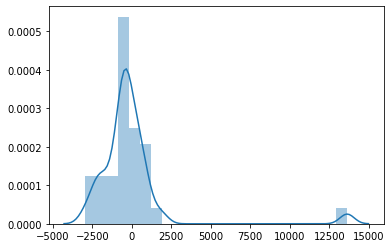

In [33]:
# Residual chart
ypred = finalregr.predict(finaltest_X)
residual = finaltest_y - ypred
sns.distplot(residual)

Residual is the difference between true values and predicted values. The residual graph above is forming a bell shape which indicates that the model fit perfectly and can predict very close to the true value. 

Now obviously there is a chance that this model is overfitting the data, but it is interesting to see how these different factors are able to play a vital role in employment rates.

### Visualizing Results


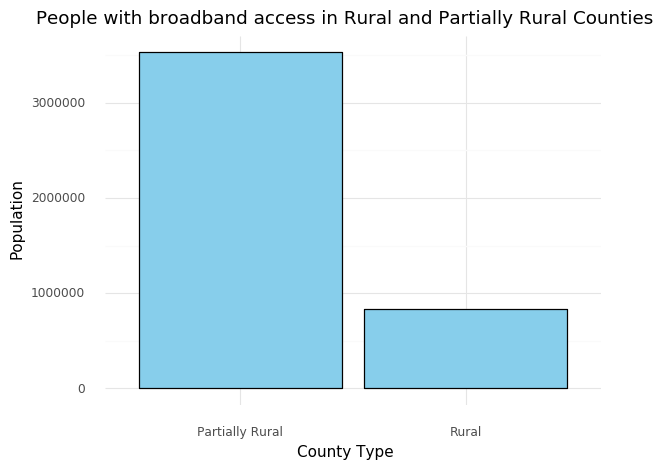

<ggplot: (8786756050247)>

In [34]:
plot2 = ggplot(prural_data,aes(x = 'usac_rural')) + geom_bar(aes(weight = 'popwbba'),fill = "skyblue", color = "black") +\
        labs(title = "People with broadband access in Rural and Partially Rural Counties",x = "County Type",y="Population") + theme_minimal()
plot2

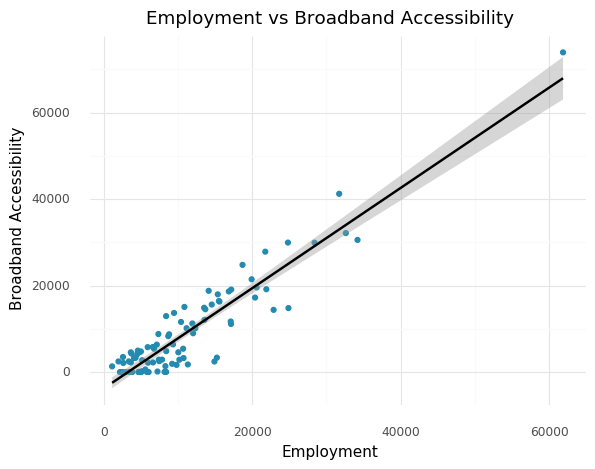

<ggplot: (8786754877574)>

In [55]:
plot3 = ggplot(rural_data, aes(x = 'E_Emp_64', y = 'popwbba')) + geom_point(color = "#238ab0") +\
        labs(title = "Employment vs Broadband Accessibility", y = "Broadband Accessibility", x = "Employment") +\
        theme_minimal() + geom_smooth(method="lm", colour="black")
plot3

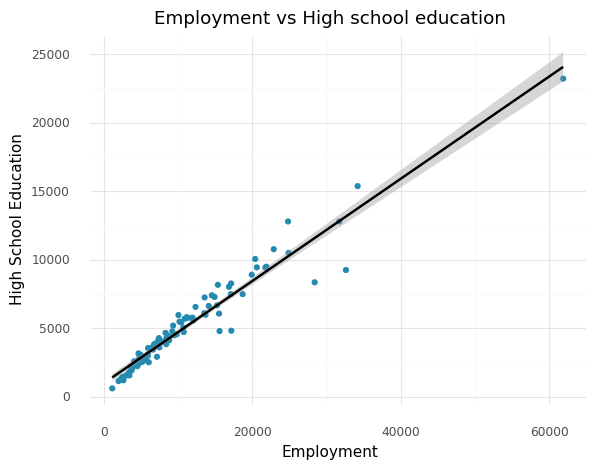

<ggplot: (-9223363250100123469)>

In [56]:

plot4 = ggplot(rural_data, aes(x = 'E_Emp_64', y = 'E_EDUC_HS')) + geom_point(color = "#238ab0") +\
        labs(title = "Employment vs High school education", y = "High School Education", x = "Employment") +\
        theme_minimal() + geom_smooth(method="lm", colour="black")
plot4

#### Some Thoughts:

In this data analysis project, I delved into socioeconomic and accessibility factors across Missouri counties to uncover their influence on employment rates. By examining this, I aim to illuminate important connections between these factors and employment rates and provide a base for furthur improvement in these fields.

This topic was chosen due to its critical societal relevance. Employment is not merely a statistical figure; it's a livelihood, a source of financial stability, and is crucial to a community's wellbeing. Understanding the underlying factors that contribute to employment rates is crucial for targeted policy-making and future improvements. 

This multidimensional analysis offers a comprehensive view by capturing the complexity of the issue. I used various variables ranging from broadband accessibility, education, income, poverty levels, disability etc to predict employment rates.

This is undeniably a data science project because it involves collecting, cleaning, and analyzing a vast dataset. It requires good understanding of the data, machine learning algorithms, and data visualization techniques to make sense of the raw data. Moreover, this project utilizes the numbers to provide a simple understanding of the relationships present. Finally I would like to hope that I have transformed data into actionable insights that have the potential to shape policies and foster societal progress.


<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>

### Project Definition, Requirements, & Expectations stage
This stage requires me to have a well defined problem statment. So in this project, I planned to utilize socioeconomic and accessbility factors and see if they influence employment rates in rural counties. This dataset is completely new to me, so it took some time to look at all the attributes in the metadata to get an idea of what I'm going to work with.

### Data Acquisition, Governance, Curation & Source code Management
The data was acquired from the Jupyter notebook. It was provided by the professor for our assignment. All code and data was handled within a single Jupyter notebook called 'Final_Project_Story'.

### Data Shaping and Carpentry
During this phase I loaded, cleaned and preprocessed the data. This involved checking for missing values, dealing with outliers, and transforming specific variables. This helped create a dataset ready for analysis.

### Exploratory Data Visualization
This stage helped me get an overview of the variables I'm working with. More specifically, it explained the distribution of employment in the rural counties. Additionally, it also aided with finding the correlation between attributes.

### Machine learning model,planning, building, testing
In this phase, I chose the most suitable model which would work with my filtered data. Aside from that, I planned out what my target variable is and the different predictor variables I would be using in each iteration of the linear regression model. I then reviewed all the steps prior to this to make sure everything is in place.

### Machine learning model, validation , visualization, interpretation.
Here I ran a few different models with different predictor variables to observe the model results. Analyzing the results and plotting some visualizations gave a good idea of the useful attributes and how its affecting the target variable. Moreover, I addressed any important observations and limitations.

### Data story & reporting
In this phase, I plotted usefull visualizations for the audience and gave a clear overview of my data story. I also talked about my observations and mentioned the significance of this analysis.

### Machine learning model deployment and monitoring
In the final stage of the project lifecycle, I think this analysis on Missouri county data transitions into actionable insights. 
In general, I think that deploying machine learning models that predict employment rates based on socioeconomic factors, provide a practical tool for policymakers. A well monitored and deployable model that supports evidence-based decision-making can enable the implementation of targeted policies aimed at improving employment rates in specific counties.